Advance price prediction :
    - Data Preparation
    - Linear Regression
    - Polynomial Regression
    - Regularization

## Data Preparation

In [2]:
# importing neccessary library
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df=pd.read_csv("/home/cbnits/Downloads/train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.info()
df.columns
df.describe
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

(1460, 81)

In [6]:
df.corr()['SalePrice'].sort_values()

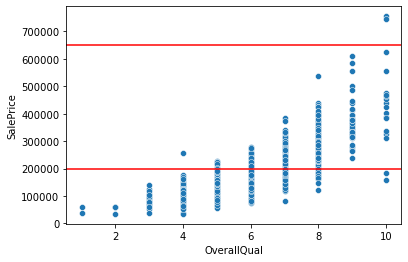

In [7]:
sns.scatterplot(data=df,x='OverallQual', y='SalePrice')
plt.axhline(y=200000,color='r')
plt.axhline(y=650000,color='r')

In [8]:
df[(df['OverallQual']>8) & (df['SalePrice']<200000)][['SalePrice', 'OverallQual']]

,SalePrice,OverallQual
523,184750,10
1298,160000,10


In [9]:
df[(df['OverallQual']>8) & (df['SalePrice']>650000)][['SalePrice', 'OverallQual']]

,SalePrice,OverallQual
691,755000,10
1182,745000,10


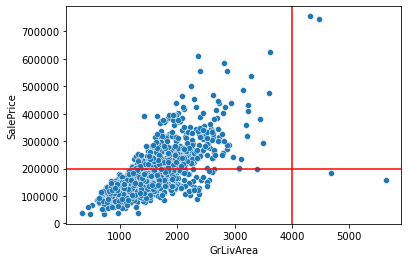

In [10]:
sns.scatterplot(data=df,x='GrLivArea', y='SalePrice')
plt.axhline(y=200000, color='r')
plt.axvline(x=4000, color='r')

In [11]:
df[(df['GrLivArea']>4000) & (df['SalePrice']>200000)][['SalePrice', 'GrLivArea']]

,SalePrice,GrLivArea
691,755000,4316
1182,745000,4476


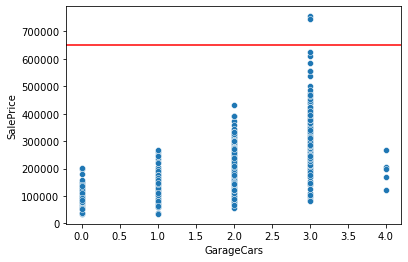

In [12]:
sns.scatterplot(data=df,x='GarageCars', y='SalePrice')
plt.axhline(y=650000, color='r')

In [13]:
df[df['SalePrice']>650000][['SalePrice', 'GarageCars']]

,SalePrice,GarageCars
691,755000,3
1182,745000,3


In [15]:
index_drop=df[df['SalePrice']>650000 ].index
df=df.drop(index_drop, axis=0)
index_drop1=df[(df['OverallQual']>8) & (df['SalePrice']<200000)].index
df=df.drop(index_drop1, axis=0)

### Make a Function to calculate the percent of missing data in each columns (feature) and then sort it

In [16]:
def missing_percent(df):
    nan_percent= 100*(df.isnull().sum()/len(df))
    nan_percent= nan_percent[nan_percent>0].sort_values()
    return nan_percent

In [17]:
df.corr()['SalePrice'].sort_values()
df=df.drop('Id',axis=1)

In [18]:
df.isnull().sum().sort_values()
100*(df.isnull().sum()/len(df)).sort_values()

MSSubClass        0.000000
TotalBsmtSF       0.000000
Heating           0.000000
SaleCondition     0.000000
CentralAir        0.000000
                   ...    
FireplaceQu      47.390110
Fence            80.769231
Alley            93.750000
MiscFeature      96.291209
PoolQC           99.656593
Length: 80, dtype: float64

In [20]:
nan_percent= missing_percent(df)
nan_percent

Electrical       0.068681
MasVnrType       0.549451
MasVnrArea       0.549451
BsmtQual         2.541209
BsmtCond         2.541209
BsmtFinType1     2.541209
BsmtExposure     2.609890
BsmtFinType2     2.609890
GarageCond       5.563187
GarageQual       5.563187
GarageFinish     5.563187
GarageType       5.563187
GarageYrBlt      5.563187
LotFrontage     17.788462
FireplaceQu     47.390110
Fence           80.769231
Alley           93.750000
MiscFeature     96.291209
PoolQC          99.656593
dtype: float64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, 'Electrical'),
  Text(1, 0, 'MasVnrType'),
  Text(2, 0, 'MasVnrArea'),
  Text(3, 0, 'BsmtQual'),
  Text(4, 0, 'BsmtCond'),
  Text(5, 0, 'BsmtFinType1'),
  Text(6, 0, 'BsmtExposure'),
  Text(7, 0, 'BsmtFinType2'),
  Text(8, 0, 'GarageCond'),
  Text(9, 0, 'GarageQual'),
  Text(10, 0, 'GarageFinish'),
  Text(11, 0, 'GarageType'),
  Text(12, 0, 'GarageYrBlt'),
  Text(13, 0, 'LotFrontage'),
  Text(14, 0, 'FireplaceQu'),
  Text(15, 0, 'Fence'),
  Text(16, 0, 'Alley'),
  Text(17, 0, 'MiscFeature'),
  Text(18, 0, 'PoolQC')])

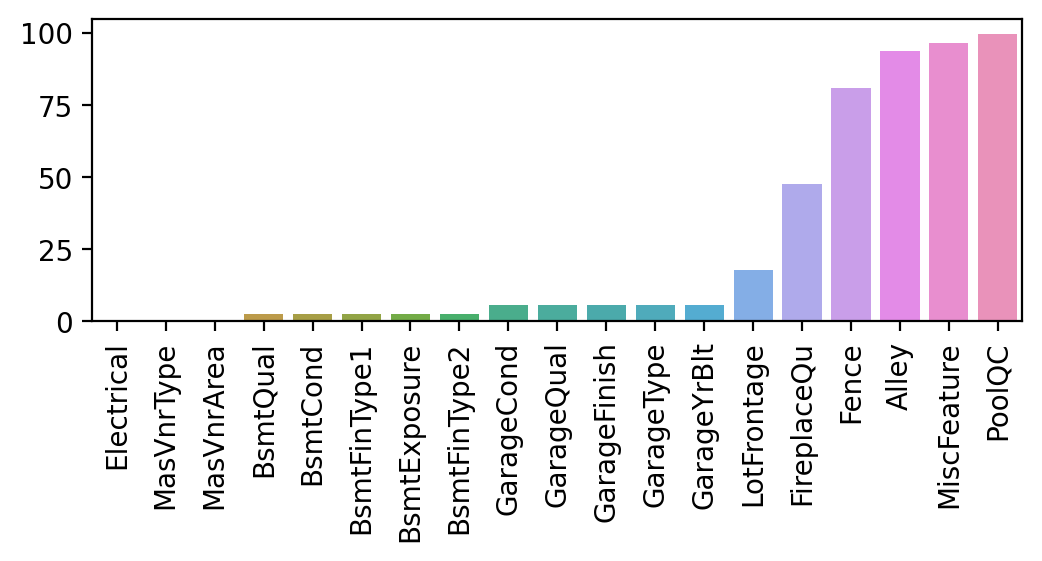

In [21]:
plt.figure(figsize=(6,2),dpi=200)
sns.barplot(x=nan_percent.index,y=nan_percent)
plt.xticks(rotation=90)

(0.0, 1.0)

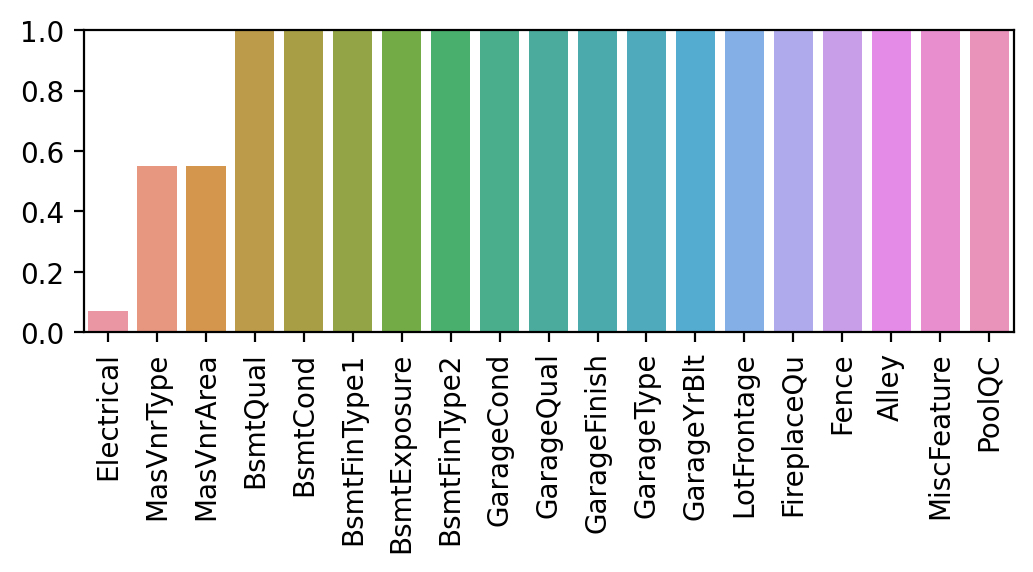

In [22]:
plt.figure(figsize=(6,2),dpi=200)
sns.barplot(x=nan_percent.index,y=nan_percent)
plt.xticks(rotation=90)
#Set 1% threshold:
plt.ylim(0,1)

In [23]:
#columns with missing Data under 1%:
nan_percent[nan_percent<1]

Electrical    0.068681
MasVnrType    0.549451
MasVnrArea    0.549451
dtype: float64

In [25]:
100/len(df)

0.06868131868131869

### It shows Electrical has got just 1 row missing Data.

### The index of a row with missing Data of Electrical:

In [26]:
df[df['Electrical'].isnull()]['Electrical']

1379    NaN
Name: Electrical, dtype: object

In [27]:
df=df.dropna(axis=0, subset=['Electrical'])

(0.0, 1.0)

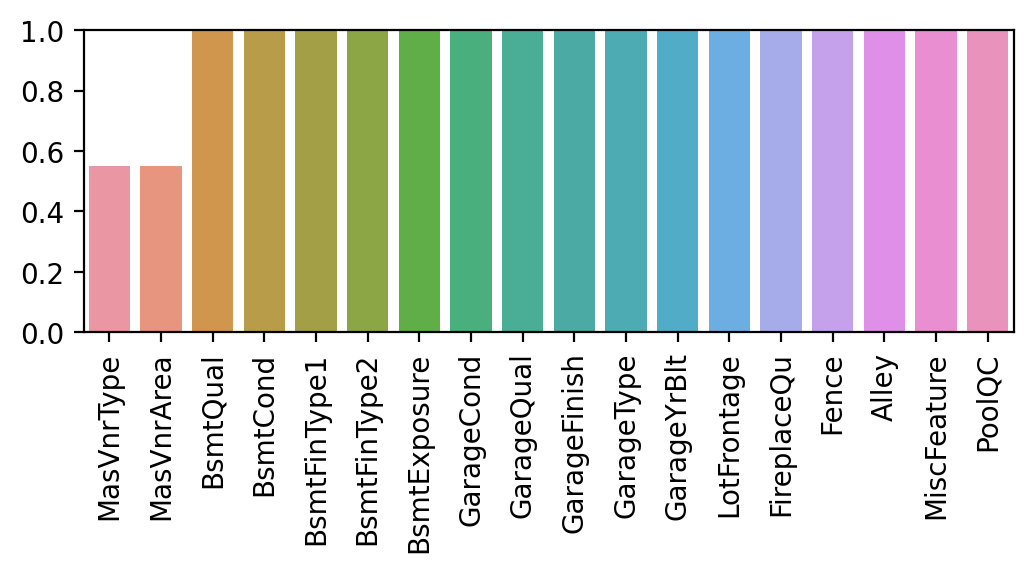

In [28]:
nan_percent= missing_percent(df)
plt.figure(figsize=(6,2),dpi=200)
sns.barplot(x=nan_percent.index,y=nan_percent)
plt.xticks(rotation=90)
#Set 1% threshold:
plt.ylim(0,1)

In [29]:
df['MasVnrType']= df['MasVnrType'].fillna('None')
df['MasVnrArea']= df['MasVnrArea'].fillna(0)

In [30]:
#columns with missing Data under 1%:
nan_percent[nan_percent<1]

MasVnrType    0.549828
MasVnrArea    0.549828
dtype: float64

In [31]:
100/len(df)

0.06872852233676977

In [32]:
df[df['Electrical'].isnull()]['Electrical']

Series([], Name: Electrical, dtype: object)

In [33]:
df=df.dropna(axis=0, subset=['Electrical'])

(0.0, 1.0)

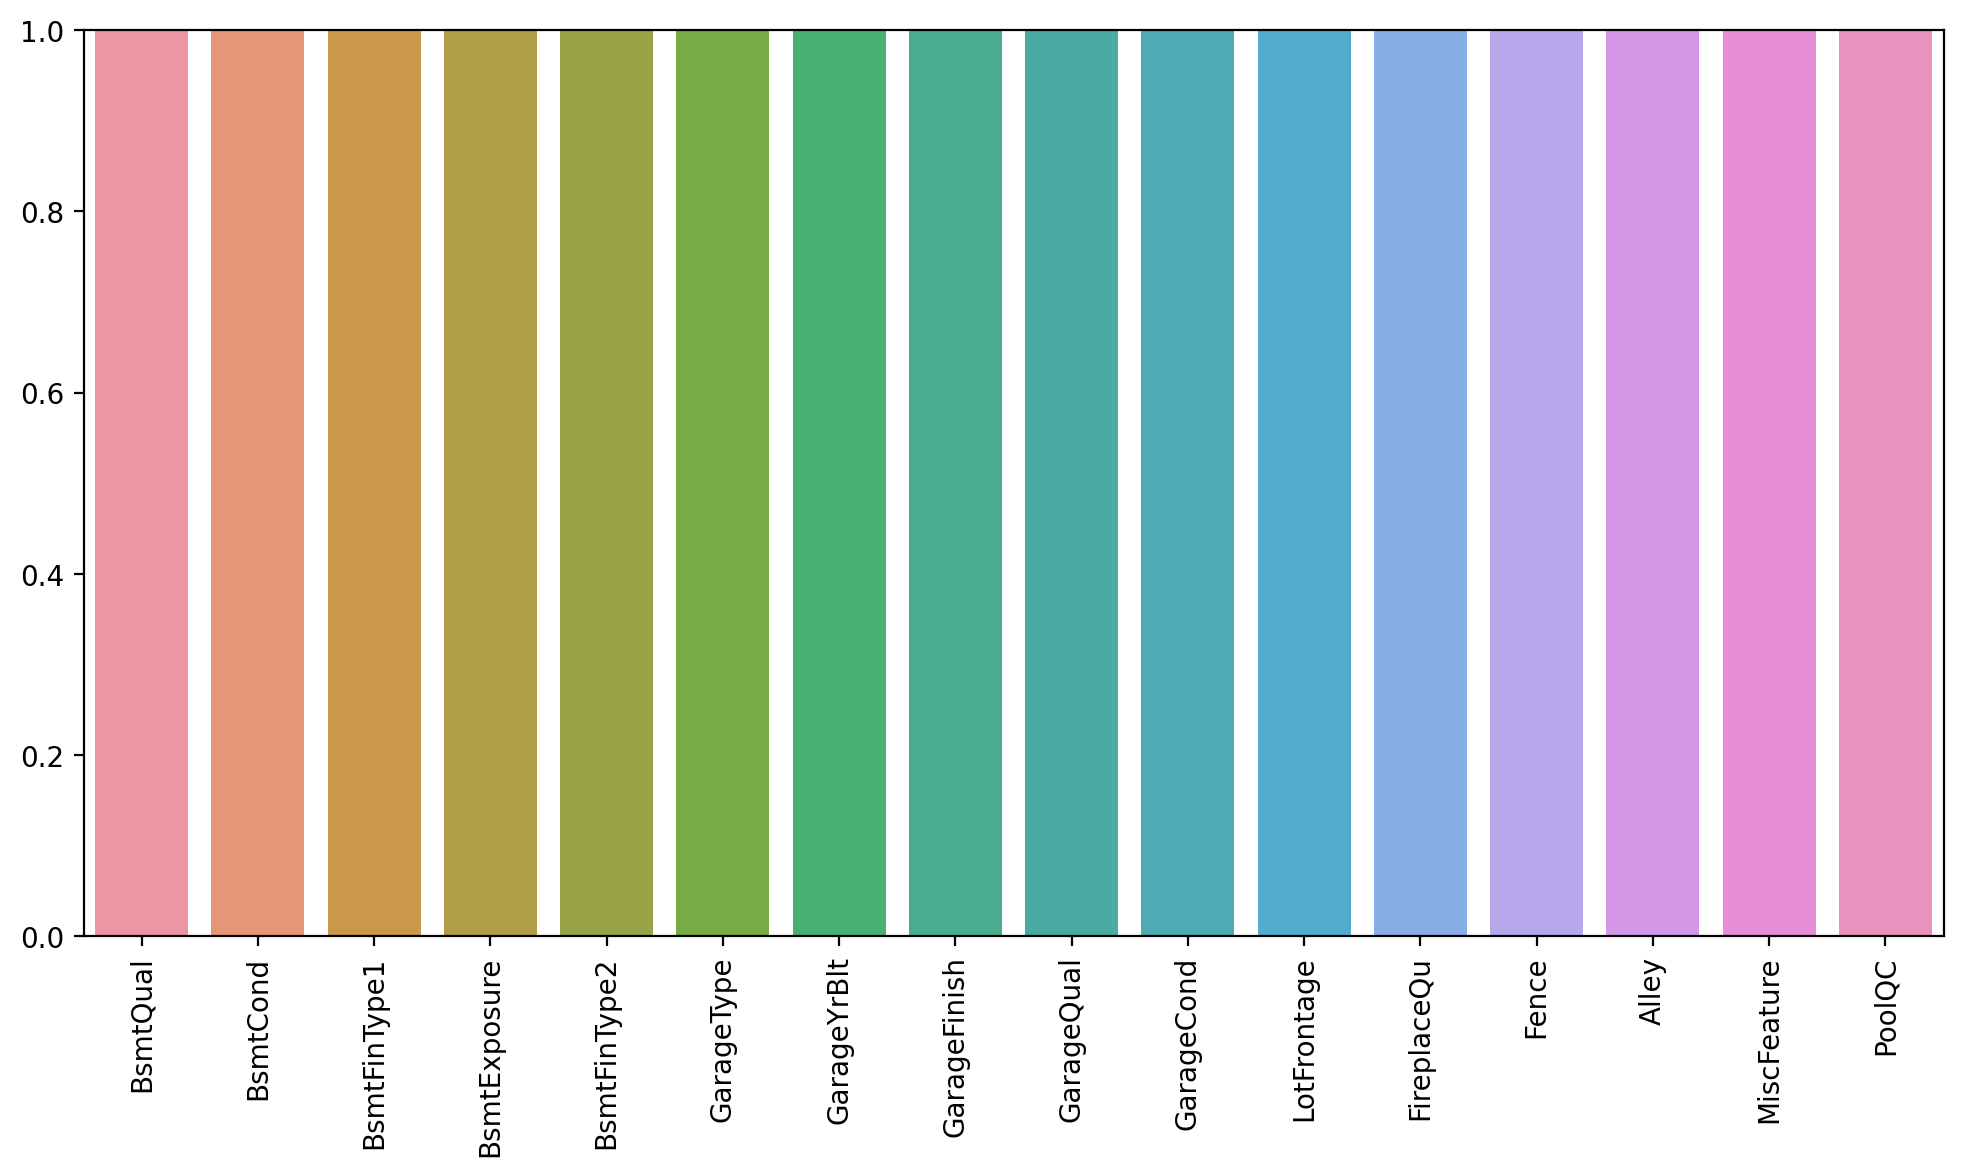

In [34]:
nan_percent= missing_percent(df)
plt.figure(figsize=(12,6),dpi=200)
sns.barplot(x=nan_percent.index,y=nan_percent)
plt.xticks(rotation=90)
#Set 1% threshold:
plt.ylim(0,1)

In [35]:
df['MasVnrType']= df['MasVnrType'].fillna('None')
df['MasVnrArea']= df['MasVnrArea'].fillna(0)

### replace the amount of missing Data with mean of the GarageYrBlt:

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'BsmtQual'),
  Text(1, 0, 'BsmtCond'),
  Text(2, 0, 'BsmtFinType1'),
  Text(3, 0, 'BsmtExposure'),
  Text(4, 0, 'BsmtFinType2'),
  Text(5, 0, 'GarageType'),
  Text(6, 0, 'GarageYrBlt'),
  Text(7, 0, 'GarageFinish'),
  Text(8, 0, 'GarageQual'),
  Text(9, 0, 'GarageCond'),
  Text(10, 0, 'LotFrontage'),
  Text(11, 0, 'FireplaceQu'),
  Text(12, 0, 'Fence'),
  Text(13, 0, 'Alley'),
  Text(14, 0, 'MiscFeature'),
  Text(15, 0, 'PoolQC')])

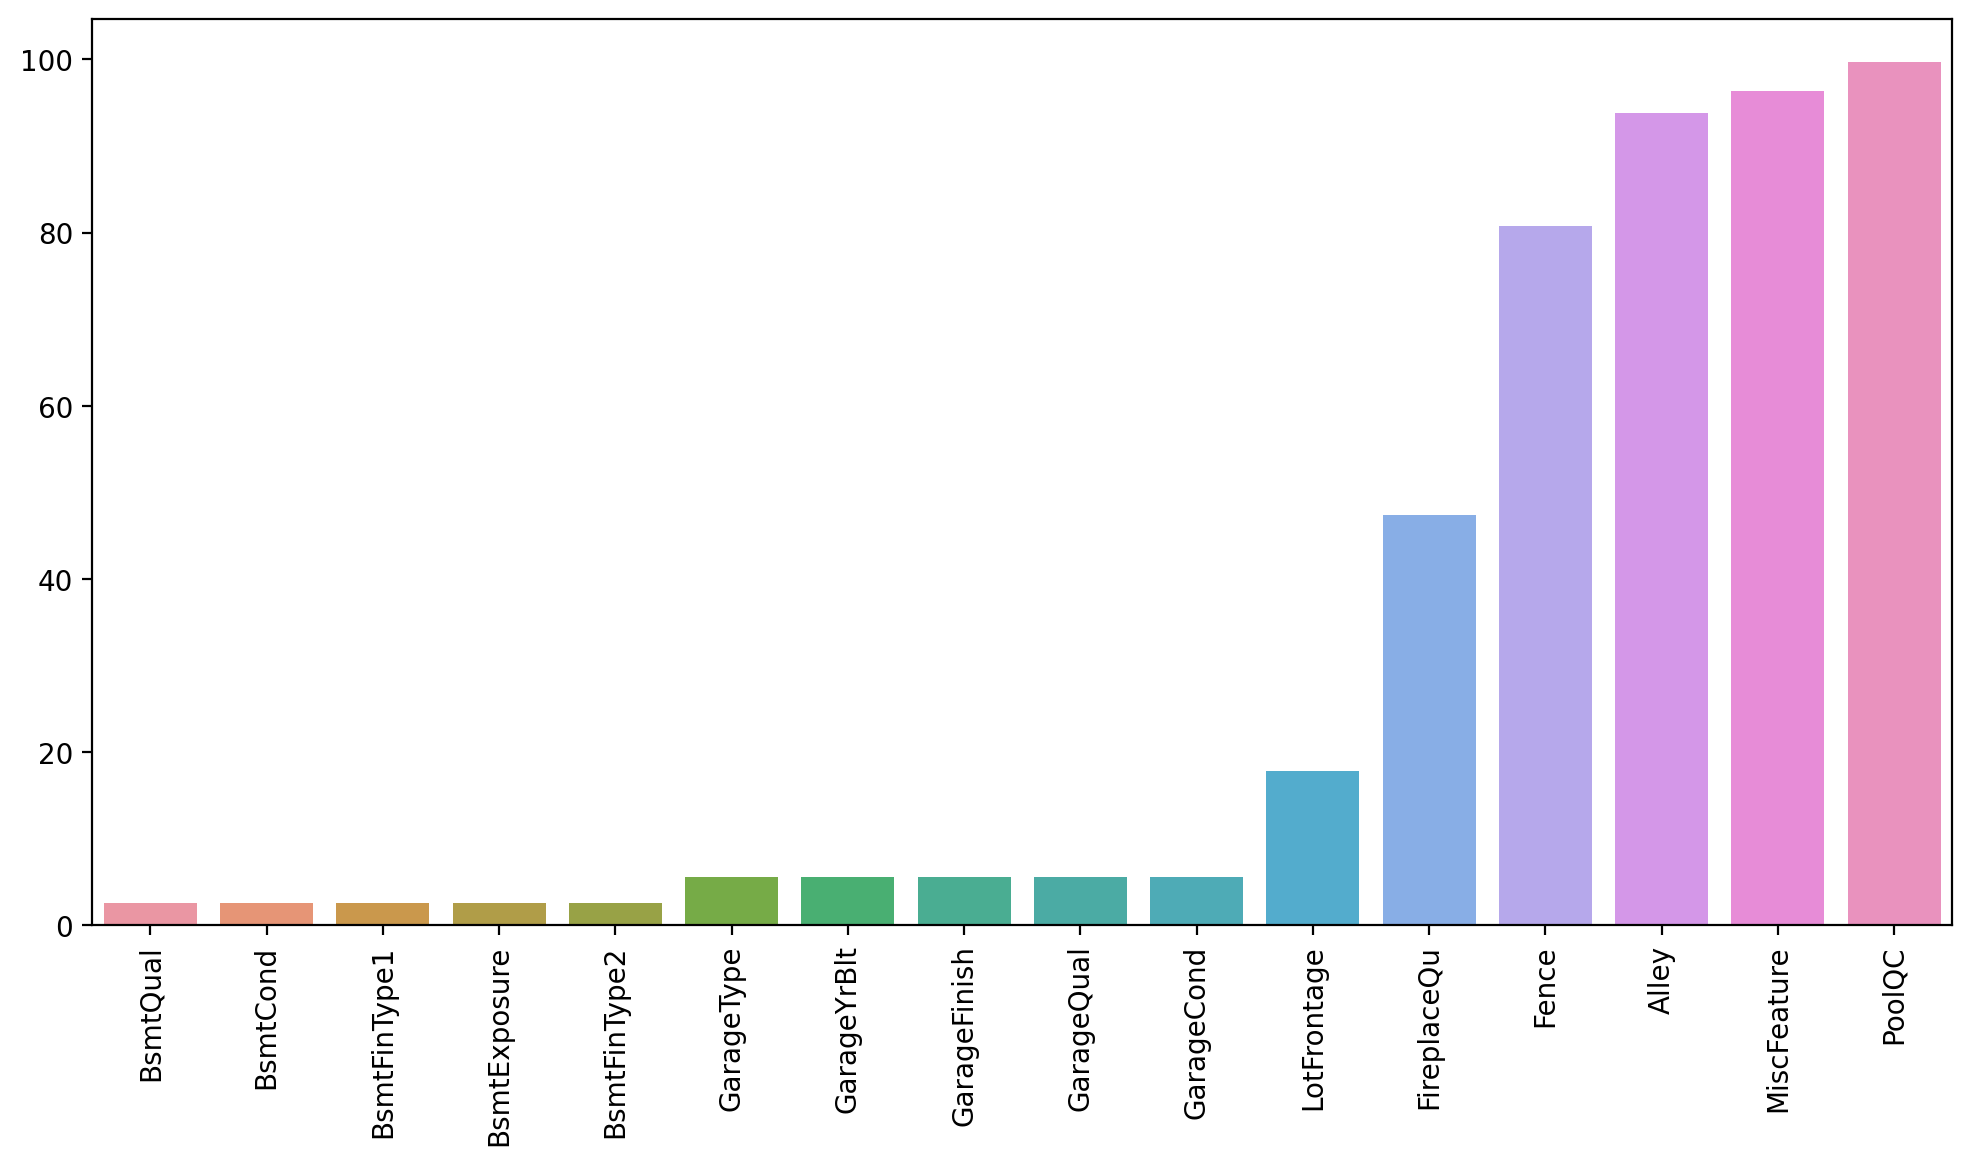

In [36]:
nan_percent= missing_percent(df)
plt.figure(figsize=(12,6),dpi=200)
sns.barplot(x=nan_percent.index,y=nan_percent)
plt.xticks(rotation=90)

In [37]:
bsm=['BsmtQual','BsmtCond','BsmtFinType1','BsmtExposure','BsmtFinType2']
for i in bsm:
    print(type(i))

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


In [38]:
df[bsm]=df[bsm].fillna('None')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'GarageType'),
  Text(1, 0, 'GarageYrBlt'),
  Text(2, 0, 'GarageFinish'),
  Text(3, 0, 'GarageQual'),
  Text(4, 0, 'GarageCond'),
  Text(5, 0, 'LotFrontage'),
  Text(6, 0, 'FireplaceQu'),
  Text(7, 0, 'Fence'),
  Text(8, 0, 'Alley'),
  Text(9, 0, 'MiscFeature'),
  Text(10, 0, 'PoolQC')])

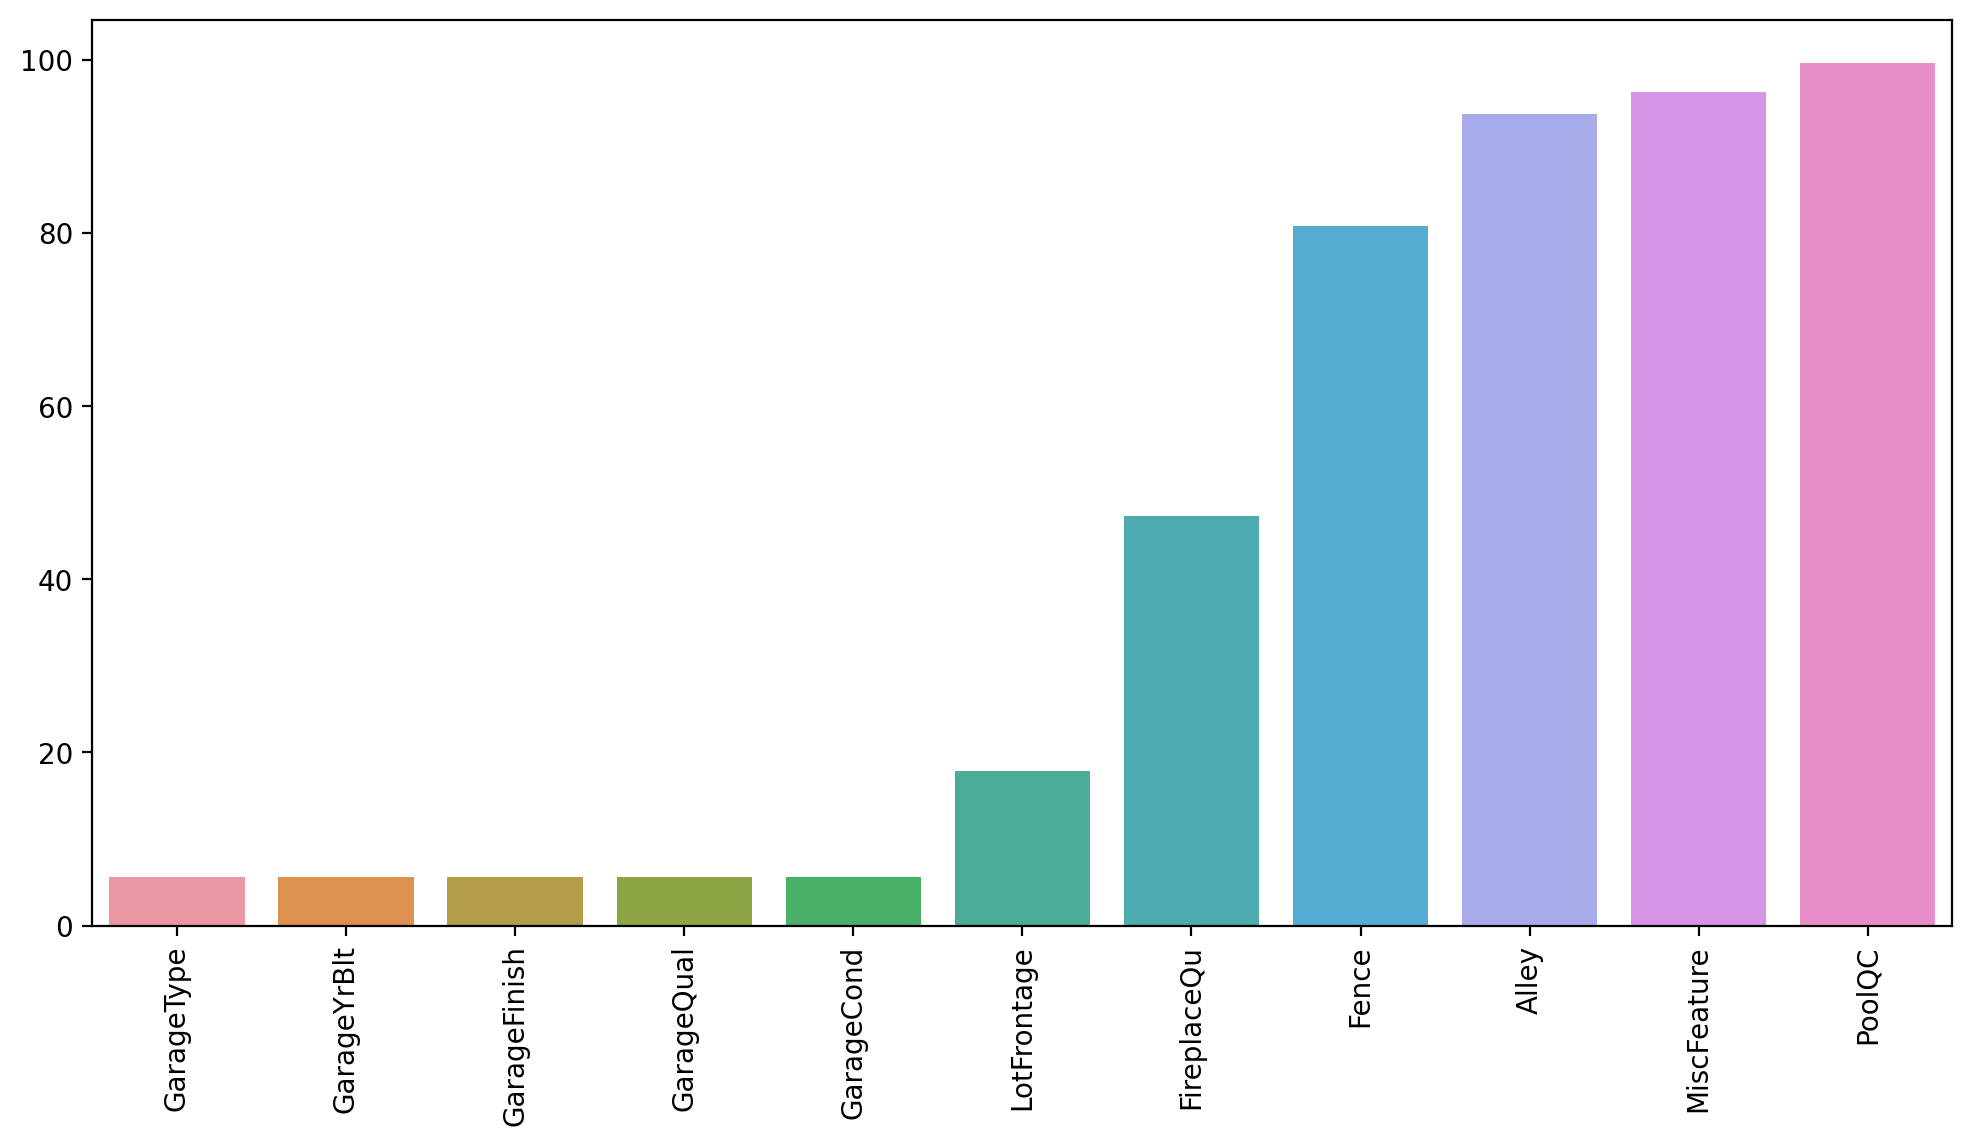

In [39]:
nan_percent= missing_percent(df)
plt.figure(figsize=(12,6),dpi=200)
sns.barplot(x=nan_percent.index,y=nan_percent)
plt.xticks(rotation=90)

In [40]:
garage=['GarageType','GarageFinish','GarageQual','GarageCond']
df[garage]=df[garage].fillna('None')

In [41]:
df['GarageYrBlt']=df['GarageYrBlt'].fillna(value=df['GarageYrBlt'].mean())

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'LotFrontage'),
  Text(1, 0, 'FireplaceQu'),
  Text(2, 0, 'Fence'),
  Text(3, 0, 'Alley'),
  Text(4, 0, 'MiscFeature'),
  Text(5, 0, 'PoolQC')])

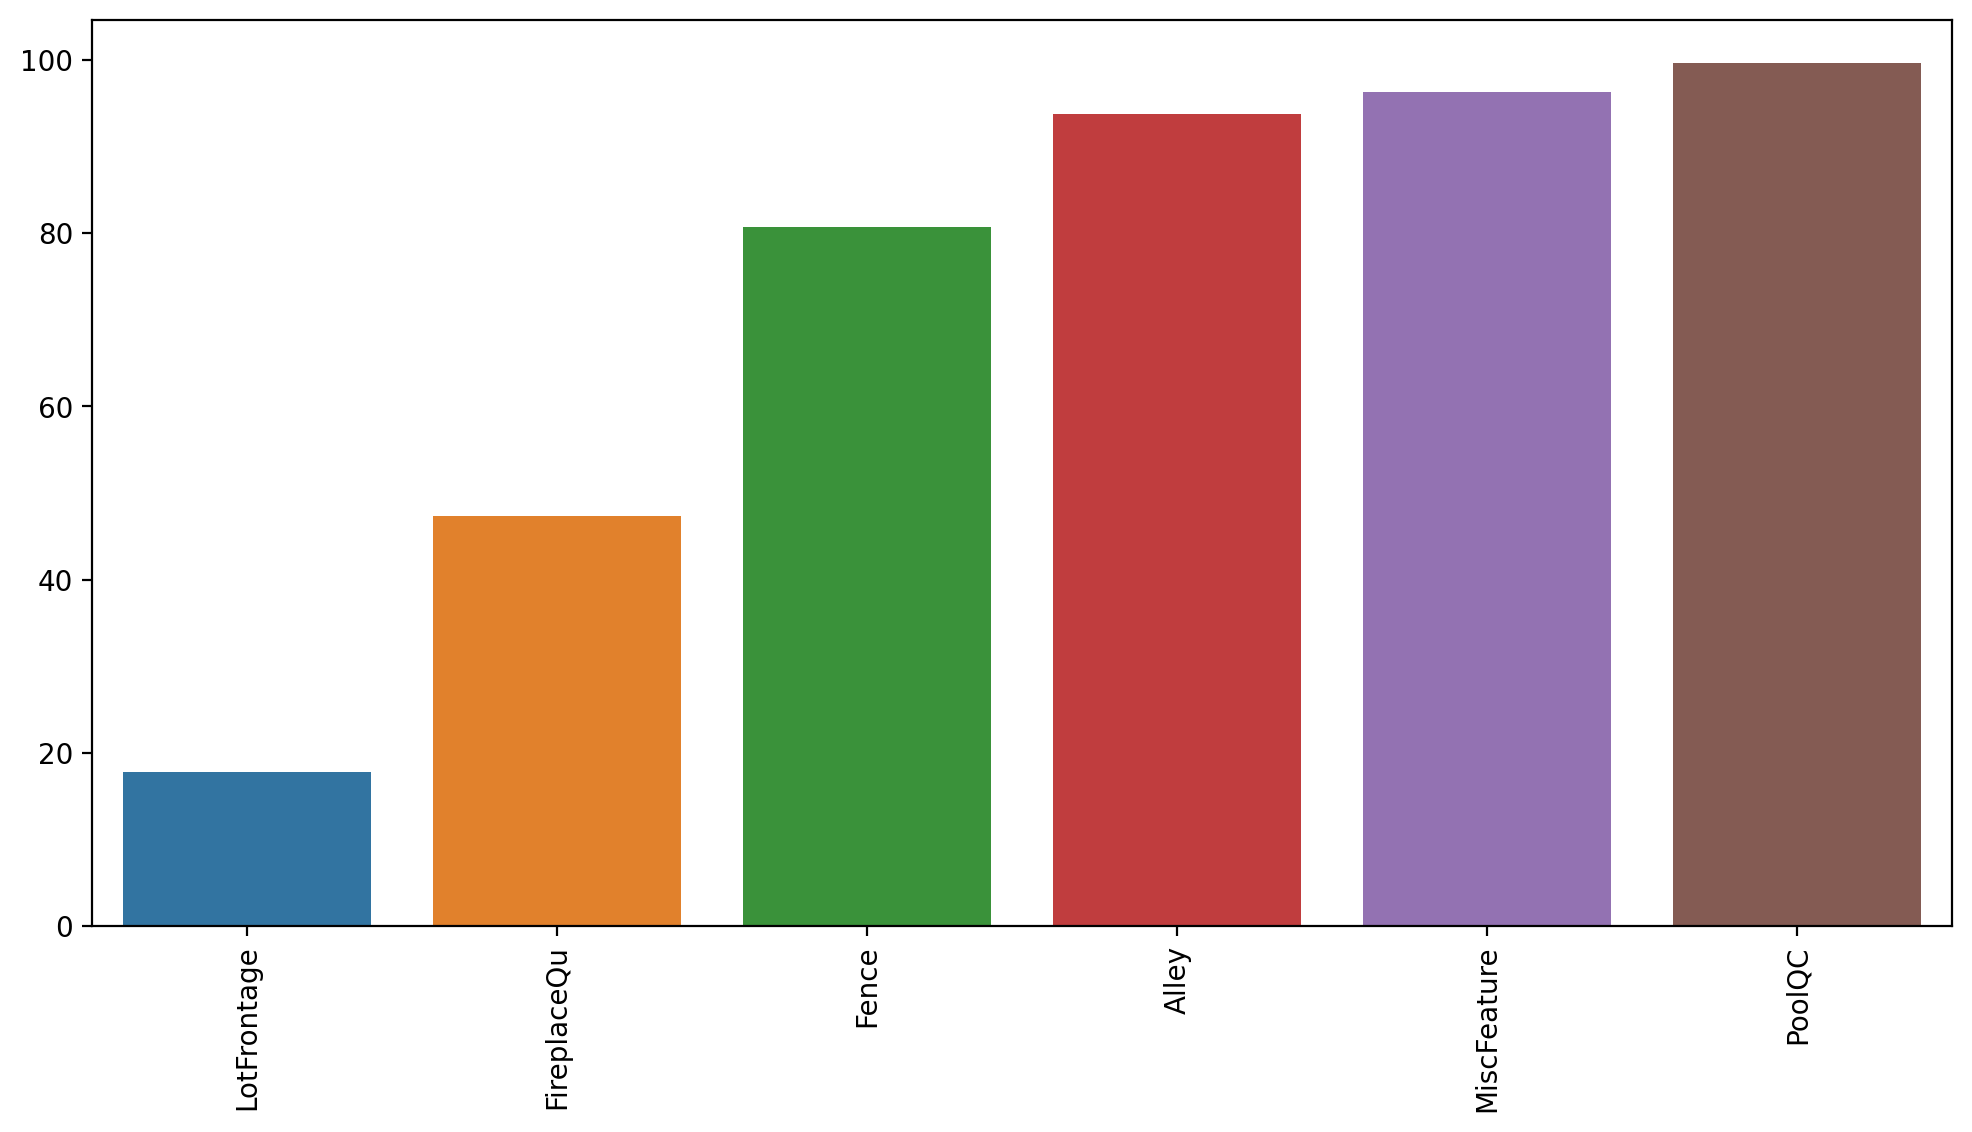

In [42]:
nan_percent= missing_percent(df)
plt.figure(figsize=(12,6),dpi=200)
sns.barplot(x=nan_percent.index,y=nan_percent)
plt.xticks(rotation=90)

<AxesSubplot:xlabel='LotFrontage', ylabel='Neighborhood'>

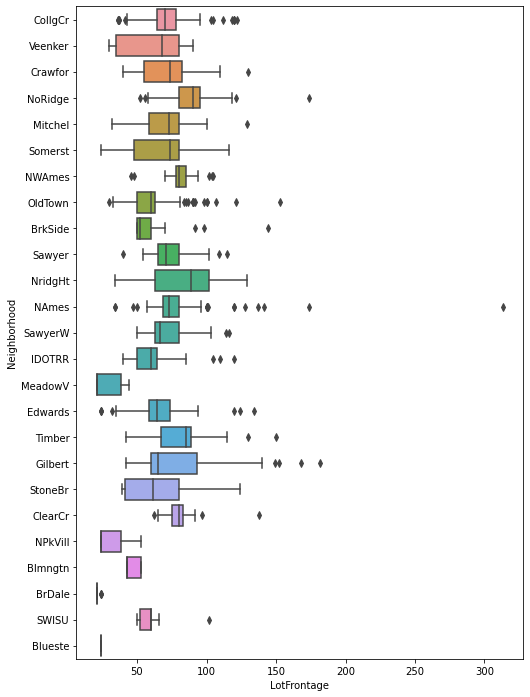

In [43]:
plt.figure(figsize=(8,12))
sns.boxplot(data=df, x='LotFrontage', y='Neighborhood')

In [44]:
df.groupby('Neighborhood')['LotFrontage'].mean()

Neighborhood
Blmngtn    47.142857
Blueste    24.000000
BrDale     21.562500
BrkSide    57.509804
ClearCr    83.461538
CollgCr    71.682540
Crawfor    71.804878
Edwards    64.811111
Gilbert    79.877551
IDOTRR     62.500000
MeadowV    27.800000
Mitchel    70.083333
NAmes      76.462366
NPkVill    32.285714
NWAmes     81.288889
NoRidge    89.290323
NridgHt    81.881579
OldTown    62.788991
SWISU      58.913043
Sawyer     74.437500
SawyerW    71.500000
Somerst    64.666667
StoneBr    62.700000
Timber     80.379310
Veenker    59.714286
Name: LotFrontage, dtype: float64

In [45]:
df['LotFrontage']=df.groupby('Neighborhood')['LotFrontage'].transform(lambda val: val.fillna(val.mean()))

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'FireplaceQu'),
  Text(1, 0, 'Fence'),
  Text(2, 0, 'Alley'),
  Text(3, 0, 'MiscFeature'),
  Text(4, 0, 'PoolQC')])

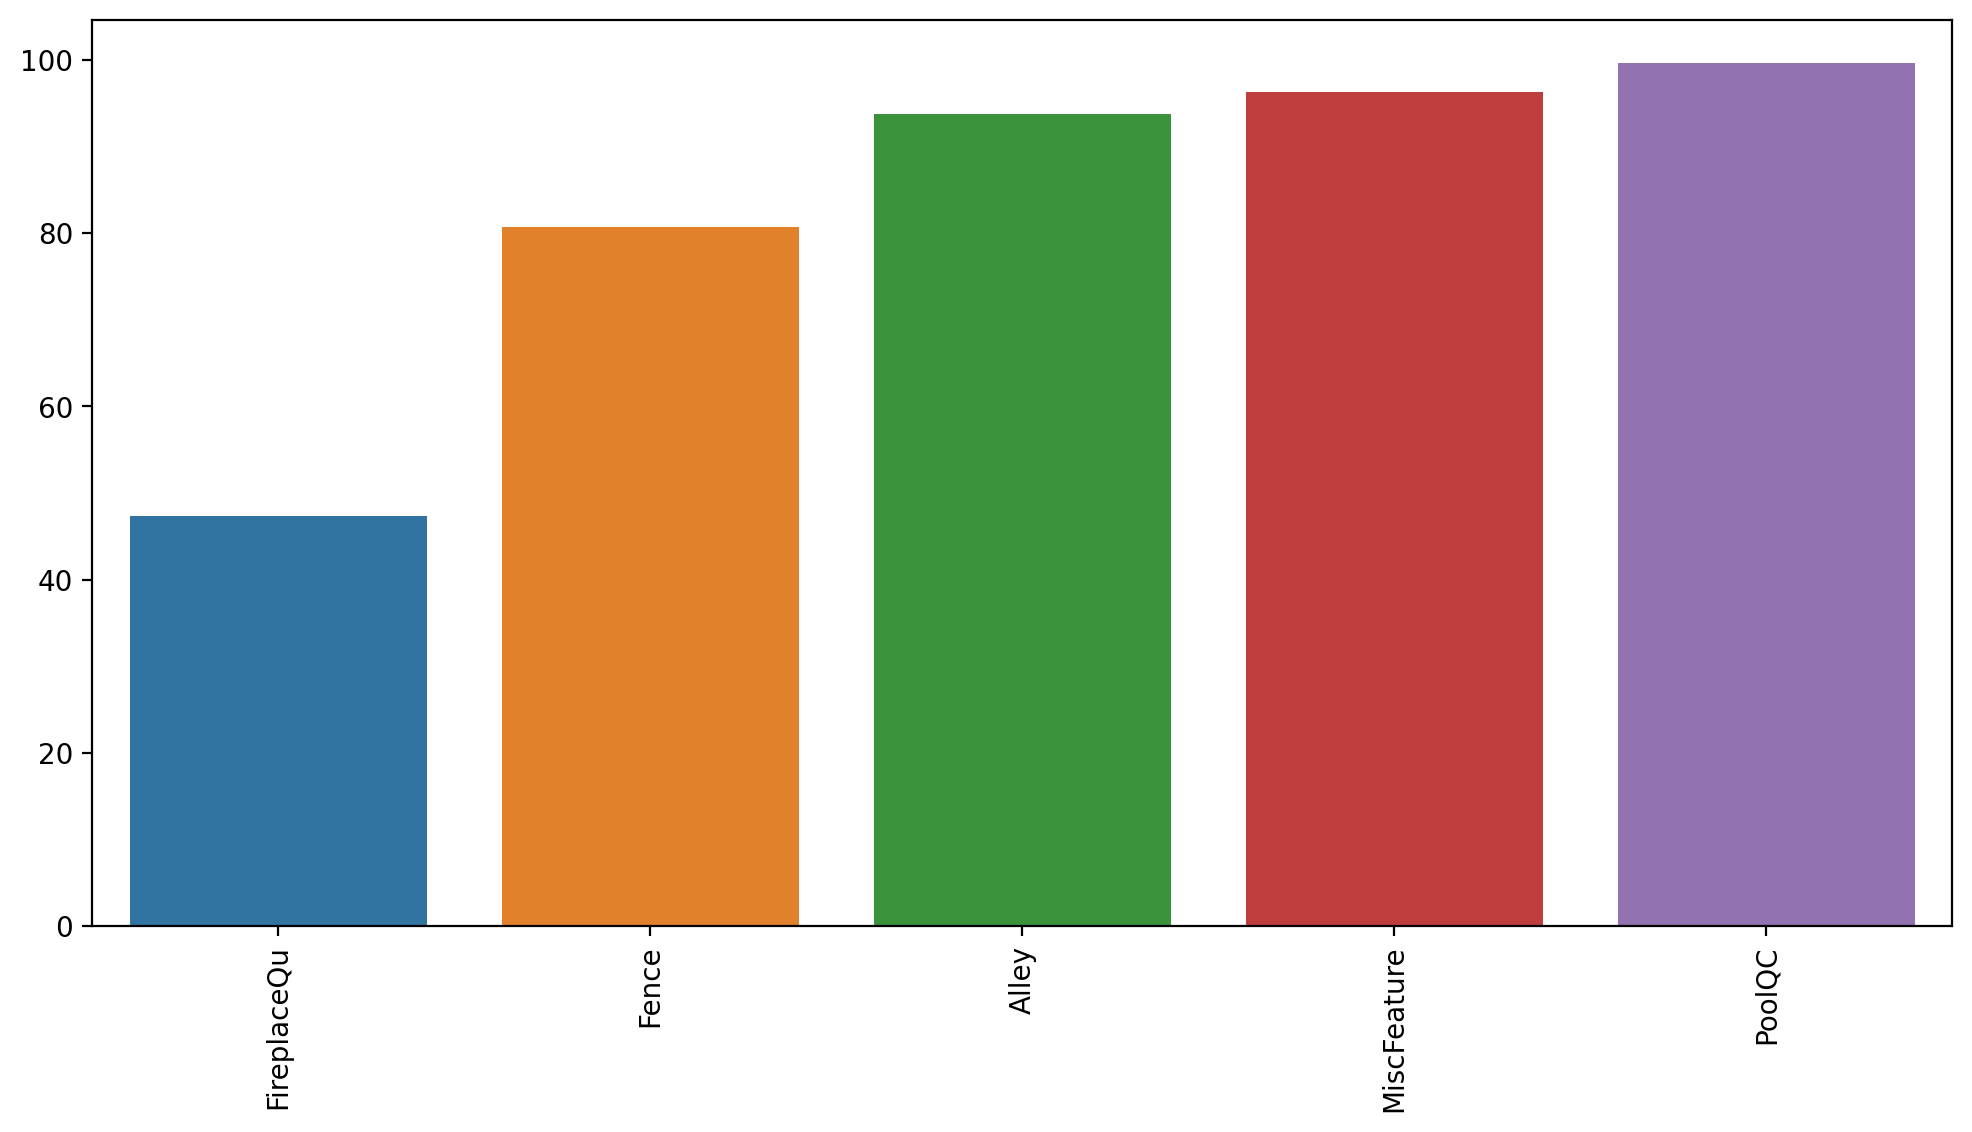

In [46]:
nan_percent= missing_percent(df)
plt.figure(figsize=(12,6),dpi=200)
sns.barplot(x=nan_percent.index,y=nan_percent)
plt.xticks(rotation=90)

In [47]:
df['FireplaceQu']= df['FireplaceQu'].fillna('None')

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Fence'),
  Text(1, 0, 'Alley'),
  Text(2, 0, 'MiscFeature'),
  Text(3, 0, 'PoolQC')])

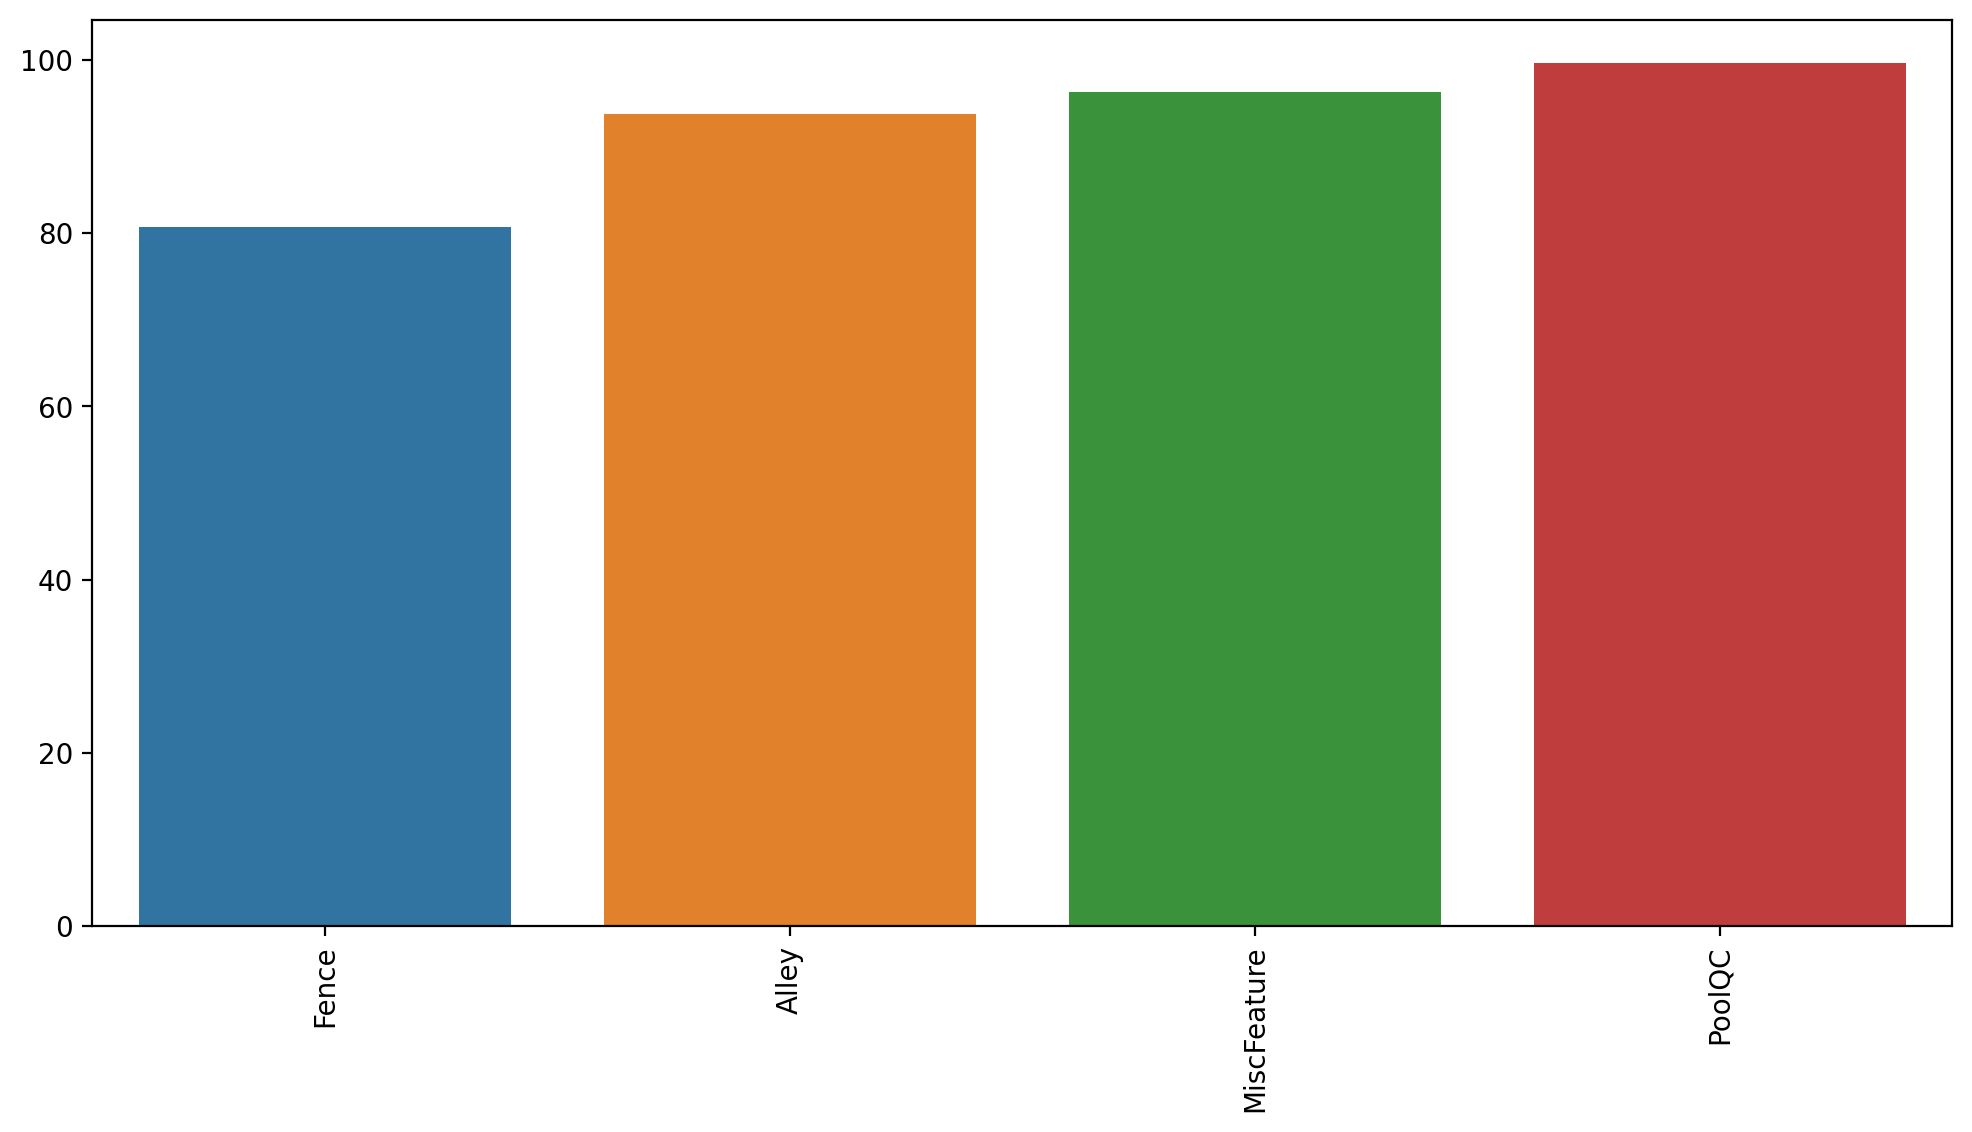

In [48]:
nan_percent= missing_percent(df)
plt.figure(figsize=(12,6),dpi=200)
sns.barplot(x=nan_percent.index,y=nan_percent)
plt.xticks(rotation=90)

In [49]:
df=df.drop(['Fence','Alley','MiscFeature','PoolQC'],axis=1)

In [50]:
nan_percent= missing_percent(df)
nan_percent

Series([], dtype: float64)

### Changing Numerical Columns to Categorical

In [51]:
df['MSSubClass']

0       60
1       20
2       60
3       70
4       60
        ..
1455    60
1456    20
1457    70
1458    20
1459    20
Name: MSSubClass, Length: 1455, dtype: int64

In [52]:
df['MSSubClass'].unique()

array([ 60,  20,  70,  50, 190,  45,  90, 120,  30,  85,  80, 160,  75,
       180,  40])

In [53]:
df['MSSubClass']= df['MSSubClass'].apply(str)

In [54]:
df.select_dtypes(include='object')

,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,60,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Gd,Typ,None,Attchd,RFn,TA,TA,Y,WD,Normal
1,20,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,70,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,60,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
1456,20,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,TA,Min1,TA,Attchd,Unf,TA,TA,Y,WD,Normal
1457,70,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal
1458,20,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Gd,Typ,None,Attchd,Unf,TA,TA,Y,WD,Normal


In [55]:
df_num= df.select_dtypes(exclude='object')
df_obj= df.select_dtypes(include='object')

In [56]:
# Converting:
df_obj= pd.get_dummies(df_obj, drop_first=True)

In [57]:
Final_df= pd.concat([df_num, df_obj], axis=1)
Final_df.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,7,5,2003,2003,196.0,706,0,150,...,0,0,0,0,1,0,0,0,1,0
1,80.0,9600,6,8,1976,1976,0.0,978,0,284,...,0,0,0,0,1,0,0,0,1,0
2,68.0,11250,7,5,2001,2002,162.0,486,0,434,...,0,0,0,0,1,0,0,0,1,0
3,60.0,9550,7,5,1915,1970,0.0,216,0,540,...,0,0,0,0,1,0,0,0,0,0
4,84.0,14260,8,5,2000,2000,350.0,655,0,490,...,0,0,0,0,1,0,0,0,1,0


In [58]:
Final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1455 entries, 0 to 1459
Columns: 259 entries, LotFrontage to SaleCondition_Partial
dtypes: float64(3), int64(33), uint8(223)
memory usage: 777.4 KB


## Linear Regression model

<Figure size 864x432 with 0 Axes>

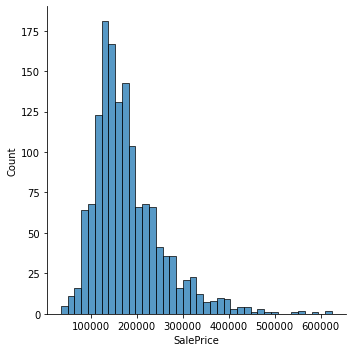

<Figure size 864x432 with 0 Axes>

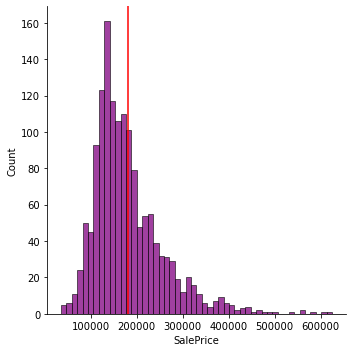

In [59]:
from scipy.stats import norm
plt.figure(figsize=(12,6))
sns.displot(Final_df['SalePrice'])
plt.figure(figsize=(12,6))
sns.displot(Final_df['SalePrice'],color='purple',bins=50)
plt.axvline(x=(Final_df['SalePrice'].mean()), color='r')

### We need to make this normal distributed.

In [60]:
Final_df['SalePrice'] = np.log1p(Final_df['SalePrice'])

<Figure size 864x432 with 0 Axes>

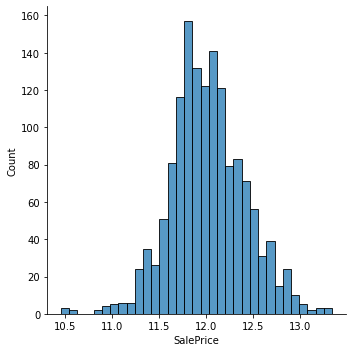

<Figure size 864x432 with 0 Axes>

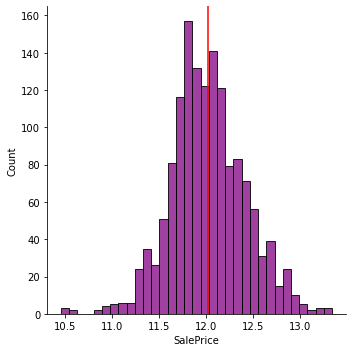

In [61]:
from scipy.stats import norm
plt.figure(figsize=(12,6))
sns.displot(Final_df['SalePrice'])
plt.figure(figsize=(12,6))
sns.displot(Final_df['SalePrice'],color='purple')
plt.axvline(x=(Final_df['SalePrice'].mean()), color='r')

In [62]:
X=Final_df.drop('SalePrice',axis=1)
y=Final_df['SalePrice']

### Determine the Features & Target Variable

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [64]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train, y_train)
pd.DataFrame(model.coef_ , X.columns ,columns=['coefcient'])

,coefcient
LotFrontage,0.000277
LotArea,0.000004
OverallQual,0.035778
OverallCond,0.044030
YearBuilt,0.002089
...,...
SaleCondition_AdjLand,0.092963
SaleCondition_Alloca,0.021960
SaleCondition_Family,0.007768
SaleCondition_Normal,0.063990


In [65]:
y_pred= model.predict(X_test)
pd.DataFrame({'Y_Test': y_test,'Y_Pred':y_pred})[:5]

,Y_Test,Y_Pred
18,11.976666,11.927168
104,12.040614,11.906941
373,11.719948,11.750520
1227,11.898195,11.970252
342,11.379406,11.331570


In [66]:
from sklearn import metrics
MAE_linear=metrics.mean_absolute_error(y_test , y_pred)
MSE_linear=metrics.mean_squared_error(y_test , y_pred)
RMSE_linear=np.sqrt(MSE_linear)
pd.DataFrame([MAE_linear,MSE_linear,RMSE_linear], index=['MAE_linear','MSE_linear','RMSE_linear'],columns=['Quantity'])

,Quantity
MAE_linear,0.089358
MSE_linear,0.017944
RMSE_linear,0.133957


Text(0.5, 1.0, 'bias of y')

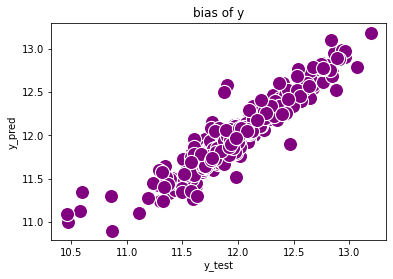

In [67]:
test_residual=y_test-y_pred
sns.scatterplot(x=y_test,y=y_pred,color='purple' ,s=200)
plt.ylabel('y_pred')
plt.xlabel('y_test')
plt.title('bias of y')

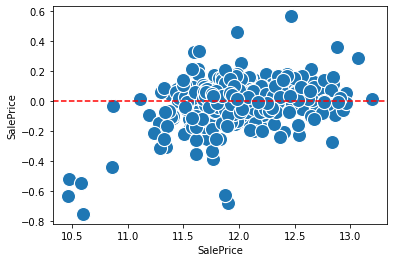

In [68]:
sns.scatterplot(x=y_test,y=test_residual,s=200)
plt.axhline(y=0,color='red',ls='--')

### As we see ,the residuals show a clear pattern.so we can say,linear regression is not suitable for this model.

In [69]:
X=Final_df.drop('SalePrice',axis=1)
y=Final_df['SalePrice']

In [70]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_converter=PolynomialFeatures(degree=2, include_bias=False)
poly_features=polynomial_converter.fit(X)
poly_features=polynomial_converter.transform(X)

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

In [72]:
from sklearn.linear_model import LinearRegression
polymodel=LinearRegression()
polymodel.fit(X_train, y_train)

LinearRegression()

In [73]:
y_pred=polymodel.predict(X_test)
pd.DataFrame({'Y_Test': y_test,'Y_Pred':y_pred, 'Residuals':(y_test-y_pred) }).head(5)

,Y_Test,Y_Pred,Residuals
18,11.976666,12.078583,-0.101917
104,12.040614,12.463778,-0.423164
373,11.719948,12.012883,-0.292935
1227,11.898195,11.872688,0.025507
342,11.379406,11.458916,-0.079510


In [74]:
from sklearn import metrics
MAE_Poly = metrics.mean_absolute_error(y_test,y_pred)
MSE_Poly = metrics.mean_squared_error(y_test,y_pred)
RMSE_Poly = np.sqrt(MSE_Poly)

pd.DataFrame([MAE_Poly, MSE_Poly, RMSE_Poly], index=['MAE_Poly', 'MSE_Poly', 'RMSE_Poly'], columns=['metrics'])

,metrics
MAE_Poly,0.308848
MSE_Poly,1.124904
RMSE_Poly,1.060615


In [75]:
del df

In [76]:
# Adjusting Model Parameters
# Train List of RMSE per degree
train_RMSE_list=[]
#Test List of RMSE per degree
test_RMSE_list=[]

for d in range(1,3):
    
    #Preprocessing
    #create poly data set for degree (d)
    polynomial_converter= PolynomialFeatures(degree=d, include_bias=False)
    poly_features= polynomial_converter.fit(X)
    poly_features= polynomial_converter.transform(X)
    
    #Split the dataset
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
    
    #Train the Model
    polymodel=LinearRegression()
    polymodel.fit(X_train, y_train)
    
    #Predicting on both Train & Test Data
    y_train_pred=polymodel.predict(X_train)
    y_test_pred=polymodel.predict(X_test)
    
    #Evaluating the Model
    
    #RMSE of Train set
    train_RMSE=np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
    
    #RMSE of Test Set
    test_RMSE=np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
      #Append the RMSE to the Train and Test List
    
    train_RMSE_list.append(train_RMSE)
    test_RMSE_list.append(test_RMSE)

In [77]:
pd.DataFrame({'train_RMSE_list': train_RMSE_list,'test_RMSE_list':test_RMSE_list})

,train_RMSE_list,test_RMSE_list
0,8.373066e-02,0.133957
1,6.606819e-12,1.060615


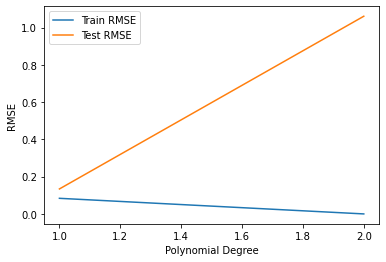

In [78]:
#**Plot the Polynomial degree VS RMSE**

plt.plot(range(1,3), train_RMSE_list[:13], label='Train RMSE')
plt.plot(range(1,3), test_RMSE_list[:13], label='Test RMSE')

plt.xlabel('Polynomial Degree')
plt.ylabel('RMSE')
plt.legend()

In [79]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_converter= PolynomialFeatures(degree=1, include_bias=False)
poly_features= polynomial_converter.fit_transform(X)

### It shows polynomial regression can't help to redious errors

In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

In [81]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaler.fit(X_train)
X_train= scaler.transform(X_train)
X_test= scaler.transform(X_test)

In [82]:
from sklearn.linear_model import Ridge
ridge_model= Ridge(alpha=10)
ridge_model.fit(X_train, y_train)

Ridge(alpha=10)

In [83]:
y_pred= ridge_model.predict(X_test)

### Regularization:

In [84]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

MAE_Ridge= mean_absolute_error(y_test, y_pred)
MSE_Ridge= mean_squared_error(y_test, y_pred)
RMSE_Ridge= np.sqrt(MSE_Ridge)
pd.DataFrame([MAE_Ridge, MSE_Ridge, RMSE_Ridge], index=['MAE_Ridge', 'MSE_Ridge', 'RMSE_Ridge'], columns=['metrics'])

,metrics
MAE_Ridge,0.087600
MSE_Ridge,0.017781
RMSE_Ridge,0.133344


## Ridge

In [85]:
from sklearn.linear_model import RidgeCV
ridge_cv_model=RidgeCV(alphas=(0.1, 1.0, 10.0), scoring='neg_mean_absolute_error')
ridge_cv_model.fit(X_train, y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), scoring='neg_mean_absolute_error')

In [86]:
ridge_cv_model.alpha_

10.0

In [87]:
y_pred_ridge= ridge_cv_model.predict(X_test)

In [88]:
MAE_ridge= mean_absolute_error(y_test, y_pred_ridge)
MSE_ridge= mean_squared_error(y_test, y_pred_ridge)
RMSE_ridge= np.sqrt(MSE_ridge)
pd.DataFrame([MAE_ridge, MSE_ridge, RMSE_ridge], index=['MAE_ridge_CV', 'MSE_ridge_CV', 'RMSE_ridge_CV'], columns=['Ridge Metrics'])

,Ridge Metrics
MAE_ridge_CV,0.087600
MSE_ridge_CV,0.017781
RMSE_ridge_CV,0.133344


In [89]:
ridge_cv_model.coef_

array([ 5.94030123e-03,  2.93648448e-02,  5.05861486e-02,  4.66203084e-02,
        5.70186019e-02,  1.38060497e-02,  9.38486150e-03,  2.68387806e-02,
        7.76487287e-03,  4.11645771e-03,  3.54942953e-02,  3.83347722e-02,
        4.42966081e-02,  3.21025404e-03,  6.72011775e-02,  1.40750576e-02,
       -9.66728801e-04,  1.60381563e-02,  1.51793693e-02, -4.36926399e-04,
       -2.25427139e-02,  3.78567353e-03,  9.19391155e-03, -3.99629085e-03,
        2.23156252e-02,  1.59162739e-02,  1.11222567e-02,  9.44493440e-03,
        4.46742884e-03,  3.54908802e-03,  1.06498540e-02,  6.61803571e-03,
        8.38445751e-04, -4.74787960e-03, -4.36865209e-03, -1.61695379e-02,
       -4.70910314e-03,  1.39877255e-02,  6.75133663e-03, -8.07627174e-03,
       -8.96618682e-04, -1.08121459e-02, -6.17774778e-03, -1.23014282e-03,
        1.74644768e-02,  1.31100600e-03, -1.18596818e-02,  2.26408452e-03,
        6.90262860e-03,  2.47535250e-02,  1.13660394e-02,  4.58846706e-02,
        1.74855757e-02,  

### Lasso

In [ ]:
from sklearn.linear_model import LassoCV
lasso_cv_model= LassoCV(eps=0.01, n_alphas=100, cv=5)
lasso_cv_model.fit(X_train, y_train)

In [91]:
lasso_cv_model.alpha_

0.004085274904584578

In [92]:
y_pred_lasso= lasso_cv_model.predict(X_test)
MAE_Lasso= mean_absolute_error(y_test, y_pred_lasso)
MSE_Lasso= mean_squared_error(y_test, y_pred_lasso)
RMSE_Lasso= np.sqrt(MSE_Lasso)

In [93]:
pd.DataFrame([MAE_Lasso, MSE_Lasso, RMSE_Lasso], index=['MAE_Lasso', 'MSE_Lasso', 'RMSE_Lasso'], columns=['Lasso Metrics'])

,Lasso Metrics
MAE_Lasso,0.086358
MSE_Lasso,0.016896
RMSE_Lasso,0.129986


In [94]:
lasso_cv_model.coef_

array([ 1.05110275e-02,  1.61724900e-02,  7.70890760e-02,  4.45831623e-02,
        6.26358210e-02,  1.29609220e-02,  5.17065994e-03,  2.63560619e-02,
        0.00000000e+00, -0.00000000e+00,  4.19547674e-02,  3.15720823e-03,
        0.00000000e+00, -6.08863853e-04,  1.29782831e-01,  1.22867413e-02,
       -0.00000000e+00,  2.37671375e-03,  5.00896243e-03, -0.00000000e+00,
       -1.34579207e-02,  0.00000000e+00,  8.99532744e-03,  0.00000000e+00,
        2.83523193e-02,  1.25986519e-02,  6.74093301e-03,  9.69337823e-03,
        0.00000000e+00,  0.00000000e+00,  5.65836574e-03,  1.16493636e-03,
       -0.00000000e+00, -0.00000000e+00, -5.48296549e-04, -1.04705358e-02,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -6.16468201e-03,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        6.69764094e-03, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  3.92440942e-03,
       -1.82255211e-02,  

### Elastic Net

In [95]:
from sklearn.linear_model import ElasticNetCV
elastic_model= ElasticNetCV(l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1],cv=5, max_iter=100000)
elastic_model.fit(X_train, y_train)

ElasticNetCV(cv=5, l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1],
             max_iter=100000)

In [96]:
elastic_model.l1_ratio_

0.5

In [97]:
y_pred_elastic=elastic_model.predict(X_test)

In [98]:
MAE_Elastic= mean_absolute_error(y_test, y_pred_elastic)
MSE_Elastic= mean_squared_error(y_test, y_pred_elastic)
RMSE_Elastic= np.sqrt(MSE_Elastic)

In [99]:
pd.DataFrame([MAE_Elastic, MSE_Elastic, RMSE_Elastic], index=['MAE_Elastic', 'MSE_Elastic', 'RMSE_Elastic'], columns=['Elastic Metrics'])

,Elastic Metrics
MAE_Elastic,0.086337
MSE_Elastic,0.016874
RMSE_Elastic,0.129898


In [100]:
elastic_model.coef_

array([ 1.07464679e-02,  1.60716858e-02,  7.65496667e-02,  4.40783199e-02,
        6.00524234e-02,  1.31678758e-02,  5.65511821e-03,  2.61373067e-02,
        0.00000000e+00, -0.00000000e+00,  4.13659190e-02,  4.77886523e-03,
        0.00000000e+00, -5.18718917e-04,  1.26661763e-01,  1.23455702e-02,
       -0.00000000e+00,  3.92443937e-03,  6.40376277e-03,  0.00000000e+00,
       -1.33885762e-02,  0.00000000e+00,  9.02572821e-03,  0.00000000e+00,
        2.78156788e-02,  1.31858012e-02,  6.91730372e-03,  9.91748040e-03,
        0.00000000e+00,  0.00000000e+00,  5.74373861e-03,  1.34453209e-03,
       -0.00000000e+00, -0.00000000e+00, -7.38546960e-04, -1.03918616e-02,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -6.62449957e-03,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        6.86378415e-03, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  4.27200437e-03,
       -1.77604338e-02,  